# Pytorch regression _4.0_ [Ocena uczniów]
# 03_04_2021 
Work on diagnostic systems.

https://archive.ics.uci.edu/ml/machine-learning-databases/00320/

In [1]:
import torch
import numpy as np
import statistics as stat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from numpy import median

I'm starting a GPU graphics card

<span style="color:green"> Odpalam karte graficzną GPU

In [2]:
#device = torch.device('cpu') # obliczenia robie na CPU
device = torch.device('cuda') # obliczenia robie na GPU

In [3]:
# kolorowe wydruki
class colors:
           
    def green(self,text):
           print('\033[32m', text, '\033[0m', sep='') 

    def blue(self,text):
         print('\033[34m', text, '\033[0m', sep='')

    def magenta(self,text):
         print('\033[35m', text, '\033[0m', sep='')  

    def cyan(self,text):
         print('\033[36m', text, '\033[0m', sep='')

    def red(self,text):
         print('\033[31m', text, '\033[0m', sep='')  

    def yellow(self,text):
         print('\033[33m', text, '\033[0m', sep='')  
pass

In [4]:
df = pd.read_csv('/media/wojciech/D6DE33C1DE3399271/1A/student-mat.csv', sep=";")      

CO = colors()
CO.green(df.dtypes)
print()
print()

CO.blue(df.shape) 
df.head(4)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


cnt: count of total rental bikes including both casual and registered



I fill all holes with values out of range

<span style="color:green"> Wypełniam wszystkie dziury wartościami z poza zakresu

# Atrybuty dla zbiorów danych student-mat.csv (kurs matematyki):


- <span style="font-size: 130%;color:#1155cc">school</span> - szkoła ucznia (binarnie: „GP” - Gabriel Pereira lub „MS” - Mousinho da Silveira)
- <span style="font-size: 130%;color:#1155cc">płeć sex</span> - płeć ucznia (binarnie: „F” - kobieta lub „M” - mężczyzna)

- <span style="font-size: 130%;color:#1155cc">wiek age </span>- wiek ucznia (liczbowo: od 15 do 22 lat)
- <span style="font-size: 130%;color:#1155cc">adres address </span>- typ adresu domowego ucznia (binarny: „U” - miejski lub „R” - wiejski)
- <span style="font-size: 130%;color:#1155cc">famsize </span>- wielkość rodziny (binarnie: „LE3” - mniejszy lub równy 3 lub „GT3” - większy niż 3)
- <span style="font-size: 130%;color:#1155cc">Pstatus </span>- status wspólnego zamieszkiwania rodziców (binarnie: „T” - mieszkający razem lub „A” - osobno)
- <span style="font-size: 130%;color:#1155cc">Medu </span>- wykształcenie matki (liczbowo: 0 - brak, 1 - podstawowe (IV klasa), 2-5 do 9 klasy, 3 - średnie lub 4 - wyższe)
- Fedu </span>- wykształcenie ojca (liczbowo: 0 - brak, 1 - podstawowe (IV klasa), 2-5 do 9 klasa, 3 - średnie lub 4 - wyższe)
- <span style="font-size: 130%;color:#1155cc">Mjob </span>- praca matki (nominalna: „nauczyciel”, „opieka zdrowotna”, „usługi” cywilne (np. Administracja lub policja), „w domu” lub „inne”)
- <span style="font-size: 130%;color:#1155cc">Fjob </span>- praca ojca (nominalna: „nauczyciel”, „zdrowie” związane z opieką zdrowotną, „usługi” cywilne (np. Administracja lub policja), „w_domu” lub „inne”)
- <span style="font-size: 130%;color:#1155cc">powód reason</span>- powód wyboru tej szkoły (nominalny: blisko „domu”, „reputacja szkoły”, preferencje „kursu” lub „inna”)
- <span style="font-size: 130%;color:#1155cc">opiekun guardian</span>- opiekun ucznia (nominalny: „matka”, „ojciec” lub „inny”)
- <span style="font-size: 130%;color:#1155cc">czas podróży traveltime</span>- czas dojazdu z domu do szkoły (liczbowo: 1 - <15 min., 2 - 15 do 30 min., 3 - 30 min. Do 1 godz. Lub 4 -> 1 godz.)
- <span style="font-size: 130%;color:#1155cc">studytime</span>studiów w dowolnym czasie studytime- tygodniowy czas nauki (numerycznie: 1 - <2 godziny, 2 - 2 do 5 godzin, 3 - 5 do 10 godzin lub 4 -> 10 godzin)
- <span style="font-size: 130%;color:#1155cc">failures niepowodzeń </span>- liczba niepowodzeń z poprzednich klas (liczbowo: n, jeśli 1 <= n <3, w przeciwnym razie 4)
- <span style="font-size: 130%;color:#1155cc">schoolup </span>- dodatkowe wsparcie edukacyjne (binarne: tak lub nie)
- <span style="font-size: 130%;color:#1155cc">famsup </span>- rodzinne wsparcie edukacyjne (binarne: tak lub nie)
- <span style="font-size: 130%;color:#1155cc">paid płatnych </span>- dodatkowo płatnych zajęć w ramach przedmiotu kursu (matematyka lub portugalski) (binarnie: tak lub nie)
- <span style="font-size: 130%;color:#1155cc">activities zajęć </span>- zajęcia pozalekcyjne (binarne: tak lub nie)
- <span style="font-size: 130%;color:#1155cc">nursery żłobek </span>- uczęszczał do przedszkola (binarnie: tak lub nie)
- <span style="font-size: 130%;color:#1155cc">higher wyższy </span>- chce podjąć wyższe wykształcenie (binarnie: tak lub nie)
- <span style="font-size: 130%;color:#1155cc">internet </span>- dostęp do Internetu w domu (binarny: tak lub nie)
- <span style="font-size: 130%;color:#1155cc">romantic romantyczny </span>- z romantycznym związkiem (binarny: tak lub nie)
- <span style="font-size: 130%;color:#1155cc">famrel </span>- jakość relacji rodzinnych (liczbowo: od 1 - bardzo zła do 5 - doskonała)
- <span style="font-size: 130%;color:#1155cc">freetime </span>godzin wolnych - czas wolny po szkole (liczbowo: od 1 - bardzo niski do 5 - bardzo wysoki)
- <span style="font-size: 130%;color:#1155cc">goout </span>- wyjście ze znajomymi (numeryczne: od 1 - bardzo niski do 5 - bardzo wysoki)
- <span style="font-size: 130%;color:#1155cc">Dalc </span>- spożycie alkoholu w dni robocze (liczbowo: od 1 - bardzo niskie do 5 - bardzo wysokie)
- <span style="font-size: 130%;color:#1155cc">Walc </span>- weekendowe spożycie alkoholu (liczbowo: od 1 - bardzo niskie do 5 - bardzo wysokie)
- <span style="font-size: 130%;color:#1155cc">health zdrowie </span>- aktualny stan zdrowia (liczbowo: od 1 - bardzo zły do ​​5 - bardzo dobry)
- <span style="font-size: 130%;color:#1155cc">absences </span> - liczba nieobecności w szkole (liczbowo: od 0 do 93)

# te oceny są związane z przedmiotem kursu, matematyką :
- <span style="font-size: 130%;color:#1155cc">G1 </span>- ocena z pierwszego okresu (liczbowo: od 0 do 20)
- <span style="font-size: 130%;color:#1155cc">G2 </span>- ocena z drugiego okresu (liczbowo: od 0 do 20)
- <span style="font-size: 130%;color:#1155cc">G3 </span>- ocena końcowa (liczbowo: od 0 do 20, docelowy wynik)

Uwaga dodatkowa: jest kilku (382) uczniów, którzy należą do obu zbiorów danych.
Tych uczniów można zidentyfikować, wyszukując identyczne atrybuty
które charakteryzują każdego ucznia, jak pokazano w załączonym pliku R.

<span style="font-size: 110%;color:#1155cc"> Wycinanie zakresu do badań

In [5]:
df2 = df.sample(frac = 1.00, random_state=148)
df2.shape

(395, 33)

<span style="font-size: 110%;color:#1155cc"> Sprawdzam czy są braki w danych.

In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
a,b = df.shape     #<- ile mamy kolumn
b

print('NUMBER OF EMPTY RECORDS vs. FULL RECORDS')
print('----------------------------------------')
for i in range(1,b):
    i = df.columns[i]
    r = df[i].isnull().sum()
    h = df[i].count()
    pr = (r/h)*100
   
    if r > 0:
        print(i,"--------",r,"--------",h,"--------",pr) 

NUMBER OF EMPTY RECORDS vs. FULL RECORDS
----------------------------------------


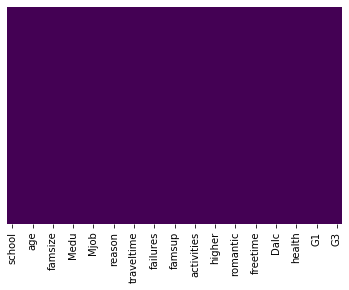

In [8]:
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<span style="font-size: 110%;color:#1155cc">Dane nie mają braków. Szukam czy nie ma błędów. Zmienne nie mają błędów.

In [9]:
df.agg(['min', 'max', 'mean', 'median'])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
min,GP,F,15.000000,R,GT3,A,0.000000,0.000000,at_home,at_home,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,3.000000,0.000000,0.00000
max,MS,M,22.000000,U,LE3,T,4.000000,4.000000,teacher,teacher,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,75.000000,19.000000,19.000000,20.00000
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.55443,5.708861,10.908861,10.713924,10.41519
median,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.00000,4.000000,11.000000,11.000000,11.00000


<span style="font-size: 110%;color:#1155cc">Sprawdzamy format danych 

In [10]:
CO.green(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


<span style="font-size: 180%;color:#1155cc"> Redukcja ilości zmiennych

<span style="font-size: 110%;color:#1155cc">Niektóre kolumny należy usunąć, ponieważ mają wysoki poziom korelacji zmiennych niezależnych (multicollinearity). Sprawdzam poziom kolelacji między zmiennymi niezależnymi.

<span style="font-size: 110%;background: yellow;font-weight:bold;color:#1155cc">Najpierw kasuje zmienne wynikowe, które są niepotrzebne 

In [11]:
del df['G1']
del df['G2']

 <span style="font-size: 180%;color:#1155cc"> 'G1', 'G2'</span>

<span style="font-size: 110%;color:#1155cc">Zemienne: 'G1', 'G2' na tym etapie nie powinny być brane pod uwage w budowie modelu ponieważ są one zmiennymi wynikowymi.

Text(0.5, 1, 'Macierz korelacji ze zmienną wynikową y')

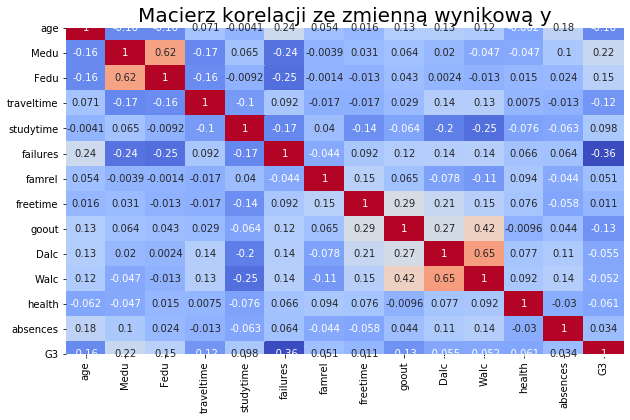

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
CORREL =df.corr()
sns.heatmap(CORREL, annot=True, cbar=False, cmap="coolwarm")
plt.title('Macierz korelacji ze zmienną wynikową y', fontsize=20)

# Mocno skorelowane

- <span style="font-size: 130%;color:#1155cc">Dalc </span>- spożycie alkoholu w dni robocze (liczbowo: od 1 - bardzo niskie do 5 - bardzo wysokie)
- <span style="font-size: 130%;color:#1155cc">Walc </span>- weekendowe spożycie alkoholu (liczbowo: od 1 - 
---------------------------------------------------
- <span style="font-size: 130%;color:#1155cc">Mjob </span>- praca matki (nominalna: „nauczyciel”, „opieka zdrowotna”, „usługi” cywilne (np. Administracja lub policja), „w domu” lub „inne”)
- <span style="font-size: 130%;color:#1155cc">Fjob </span>- praca ojca (nominalna: „nauczyciel”, „zdrowie” związane z opieką zdrowotną, „usługi” cywilne (np. Administracja lub policja), „w_domu” lub „inne”)

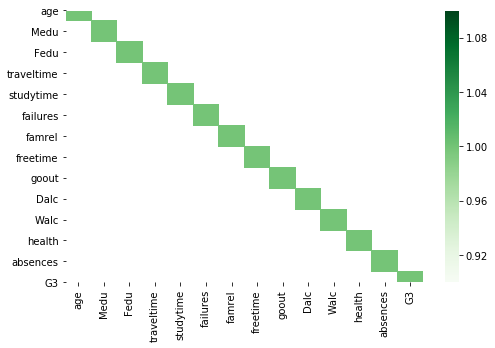

In [13]:
import seaborn as sns

CORR = df.corr()

kot = CORR[CORR>=.7]
plt.figure(figsize=(8,5))
sns.heatmap(kot, cmap="Greens")

<span style="font-size: 110%;color:#1155cc">Niektóre kolumny należy usunąć, ponieważ mają wysoki poziom korelacji zmiennych niezależnych (multicollinearity).
    
<span style="font-size: 110%;background: yellow;font-weight:bold;color:#1155cc"> 'mnth' i 'sezon' 
    
<span style="font-size: 110%;background: yellow;font-weight:bold;color:#1155cc"> 'temp' i 'atemp'

<span style="font-size: 110%;color:#1155cc">Na wykresie widać wyraźnie, że zmienne atempt i tempt są zbyt mocno skorelowane. Należy jedną z tych skorelowanych zmiennych wyeliminować.Ponieważ wynik 'cnt' i zmienne 'temp' i 'atemp' mają format ciągły, można zastosować eliminację przez porównanie poziomu korelacji Persona. 

Text(0, 0.5, 'Zmienne nezależne ciągłe')

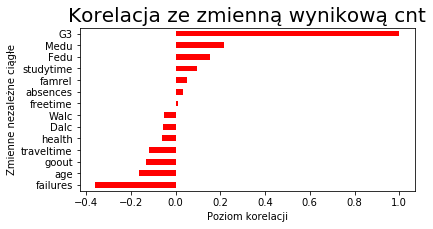

In [14]:
import matplotlib.pyplot as plt

corr = df.corr().sort_values('G3')
plt.figure(figsize=(6,3))
corr['G3'].plot(kind='barh', color='red')
plt.title('Korelacja ze zmienną wynikową cnt', fontsize=20)
plt.xlabel('Poziom korelacji')
plt.ylabel('Zmienne nezależne ciągłe')

- <span style="font-size: 130%;color:#1155cc">failures </span>- liczba niepowodzeń z poprzednich klas (liczbowo: n, jeśli 1 <= n <3, w przeciwnym razie 4)

<span style="font-size: 180%;color:#1155cc"> 'failures'</span>

<span style="font-size: 110%;color:#1155cc">Jak komuś nie szło w poprzednich latach to i teraz mu nie będzie szło

<span style="font-size: 150%;background: white;font-weight:bold;color:#1155cc">Zmienne dyskretne mają format 'int64' a powinny mieć 'category'.

In [15]:
a,b = df.shape     #<- ile mamy kolumn
b
discrete_var = []    #<-- zaczyn do tworzenia listy


print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(0,b):
    i = df.columns[i]
    f = df[i].dtypes
    h = df[i].nunique()
    
    if f == np.object or h<=24:
           print(i,"---",f,"---",h)
           discrete_var.append(i)       #<-- Tworzę listę zmiennych dyskretnych           
            

ONLY DISCRETE FUNCTION
----------------------
school --- object --- 2
sex --- object --- 2
age --- int64 --- 8
address --- object --- 2
famsize --- object --- 2
Pstatus --- object --- 2
Medu --- int64 --- 5
Fedu --- int64 --- 5
Mjob --- object --- 5
Fjob --- object --- 5
reason --- object --- 4
guardian --- object --- 3
traveltime --- int64 --- 4
studytime --- int64 --- 4
failures --- int64 --- 4
schoolsup --- object --- 2
famsup --- object --- 2
paid --- object --- 2
activities --- object --- 2
nursery --- object --- 2
higher --- object --- 2
internet --- object --- 2
romantic --- object --- 2
famrel --- int64 --- 5
freetime --- int64 --- 5
goout --- int64 --- 5
Dalc --- int64 --- 5
Walc --- int64 --- 5
health --- int64 --- 5
G3 --- int64 --- 18


In [16]:
CO.green(discrete_var)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3']


<span style="font-size: 110%;color:#1155cc"> Tworzę 4 kategorie dla 'absences'
    
    jest to zmienna, która ma jest jedyna ciągła - a dane mają znaczenia jak sie je podzieli na kategorię 

In [17]:

df = df.assign(absences_cat=pd.cut(df.absences,[0,5,15,30,50],labels=['good','medium','bad','very_bad']))
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,absences_cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,6,medium
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,6,good
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,10,medium
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,10,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,medium
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,16,good
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,7,good
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,10,NaN


In [18]:
df['absences_cat'].replace(np.nan, 'good',inplace=True)

In [19]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,absences_cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,6,medium
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,6,good
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,10,medium
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,10,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,medium
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,16,good
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,7,good
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,10,good


In [20]:
CO.green(df[discrete_var].dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
G3             int64
dtype: object


In [21]:
df[discrete_var] =  df[discrete_var].astype('category')

In [22]:
CO.magenta(df.dtypes)

school          category
sex             category
age             category
address         category
famsize         category
Pstatus         category
Medu            category
Fedu            category
Mjob            category
Fjob            category
reason          category
guardian        category
traveltime      category
studytime       category
failures        category
schoolsup       category
famsup          category
paid            category
activities      category
nursery         category
higher          category
internet        category
romantic        category
famrel          category
freetime        category
goout           category
Dalc            category
Walc            category
health          category
absences           int64
G3              category
absences_cat    category
dtype: object


- <span style="font-size: 130%;color:#1155cc">school</span> - szkoła ucznia (binarnie: „GP” - Gabriel Pereira lub „MS” - Mousinho da Silveira)
- <span style="font-size: 130%;color:#1155cc">absences </span> - liczba nieobecności w szkole (liczbowo: od 0 do 93)

<span style="font-size: 110%;color:#1155cc"> Jeszcze raz robimy wektor wartości dyskretnych bo troche nam sie zmieniło 

In [23]:
a,b = df.shape     #<- ile mamy kolumn
b
discrete_var = []    #<-- zaczyn do tworzenia listy


print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(0,b):
    i = df.columns[i]
    f = df[i].dtypes
    h = df[i].nunique()
    
    if f == np.object or h<=24:
           print(i,"---",f,"---",h)
           discrete_var.append(i)       #<-- Tworzę listę zmiennych dyskretnych           
            

ONLY DISCRETE FUNCTION
----------------------
school --- category --- 2
sex --- category --- 2
age --- category --- 8
address --- category --- 2
famsize --- category --- 2
Pstatus --- category --- 2
Medu --- category --- 5
Fedu --- category --- 5
Mjob --- category --- 5
Fjob --- category --- 5
reason --- category --- 4
guardian --- category --- 3
traveltime --- category --- 4
studytime --- category --- 4
failures --- category --- 4
schoolsup --- category --- 2
famsup --- category --- 2
paid --- category --- 2
activities --- category --- 2
nursery --- category --- 2
higher --- category --- 2
internet --- category --- 2
romantic --- category --- 2
famrel --- category --- 5
freetime --- category --- 5
goout --- category --- 5
Dalc --- category --- 5
Walc --- category --- 5
health --- category --- 5
G3 --- category --- 18
absences_cat --- category --- 4


In [24]:
CO.cyan(discrete_var)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3', 'absences_cat']


<span style="font-size: 110%;color:#1155cc"> Wyrzucamy zmienną G3 bo to zmienna wynikowa

In [25]:
discrete_var.remove('G3')

In [26]:
CO.cyan(discrete_var)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_cat']


<span style="font-size: 180%;color:#1155cc"> Kodowanie na gorąco

<span style="font-size: 110%;color:#1155cc">Wypisuje zmienne, które są dyskretne i które należy kodować na gorąco.

Ile jest zmiennych w liście?

In [27]:
MPO=len(discrete_var) # ilość elementów w liście
MPO

30

In [28]:
data_dummy = df

def dummify_dataset(df, col):
    dummy_column = pd.get_dummies(df[col], prefix = col, drop_first = True)
    PKP = pd.concat([df,dummy_column],axis = 1)
    PKP = PKP.drop([col], axis=1)
    return PKP

for i in range(0,MPO):    # Trzeba wpisać właściwą liczbę zmiennych dyskretnych
    data_dummy = dummify_dataset(data_dummy,discrete_var[i])

In [29]:
df = data_dummy 
df.sample(3)

,absences,G3,school_MS,sex_M,age_16,age_17,age_18,age_19,age_20,age_21,...,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5,absences_cat_medium,absences_cat_bad,absences_cat_very_bad
352,7,8,1,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
160,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
198,24,18,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [30]:
df.columns

Index(['absences', 'G3', 'school_MS', 'sex_M', 'age_16', 'age_17', 'age_18',
       'age_19', 'age_20', 'age_21', 'age_22', 'address_U', 'famsize_LE3',
       'Pstatus_T', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_1', 'Fedu_2',
       'Fedu_3', 'Fedu_4', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other', 'traveltime_2', 'traveltime_3',
       'traveltime_4', 'studytime_2', 'studytime_3', 'studytime_4',
       'failures_1', 'failures_2', 'failures_3', 'schoolsup_yes', 'famsup_yes',
       'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes',
       'internet_yes', 'romantic_yes', 'famrel_2', 'famrel_3', 'famrel_4',
       'famrel_5', 'freetime_2', 'freetime_3', 'freetime_4', 'freetime_5',
       'goout_2', 'goout_3', 'goout_4', 'goout_5', 'Dalc_2', 'Dalc_3',
       'Dalc_4', 'Dalc_5', 'Walc_2', 'Wa

 <span style="font-size: 110%;color:#1155cc"> Wyrzucam 'absences'

In [31]:
del df['absences']

 <span style="font-size: 110%;color:#1155cc"> Podział zbioru na testowy i treningowy.

In [32]:
from sklearn.model_selection import train_test_split 

y = df['G3']
X = df.drop('G3', axis=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25, random_state = 148)

<span style="font-size: 110%;background:##ffe599">Wynik (ilość rowerów wypożyczonych) przed skalowaniem</span>  

In [33]:
y[:5]

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: category
Categories (18, int64): [0, 4, 5, 6, ..., 17, 18, 19, 20]

<span style="font-size: 110%;background:##ffe599">Zmienne opisujące przed skalowaniem

In [34]:
X[:5]

,school_MS,sex_M,age_16,age_17,age_18,age_19,age_20,age_21,age_22,address_U,...,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5,absences_cat_medium,absences_cat_bad,absences_cat_very_bad
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Scaling (normalization) of the X value

X should never be too big. Ideally, it should be in the range [-1, 1]. If this is not the case, normalize the input.

### <span style="color:green"> Skalowanie (normalizacja) wartości X

<span style="color:green"> X nigdy nie powinien być zbyt duży. Idealnie powinien być w zakresie [-1, 1]. Jeśli tak nie jest, należy znormalizować dane wejściowe.

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

print(np.round(X.std(), decimals=2), np.round(X.mean(), decimals=2))

1.0 -0.0


In [36]:
y.value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

In [37]:
y= y.astype(float)

In [38]:
y = (y / 100)  # max test score is 100
print(y.head(3))
print(np.round(y.std(), decimals=2), np.round(y.mean(), decimals=2))

0    0.06
1    0.06
2    0.10
Name: G3, dtype: float64
0.05 0.1


### Creates random input and output

### <span style="color:green"> Tworzy losowe dane wejściowe i wyjściowe 

In [39]:
import numpy as np

#X = X.values       #- jak była normalizacja to to nie działa
X = torch.tensor(X)
print(X[:3])

tensor([[-0.3630, -0.9482, -0.5978, -0.5744,  1.9537, -0.2543, -0.0875, -0.0504,
         -0.0504,  0.5354, -0.6369, -2.9384, -0.4190, -0.5939, -0.5783,  1.4196,
         -0.5118, -0.6409, -0.5822,  1.7648, -0.3069, -0.7451, -0.5939, -0.4149,
         -0.2185, -1.1041, -0.6252,  3.5526, -0.6173, -0.3167, -0.6017,  0.6685,
         -0.2969,  1.6406, -0.2487, -0.1438,  0.9975, -0.4438, -0.2709, -0.3807,
         -0.2121, -0.2055,  2.5971, -1.2577, -0.9197, -1.0179,  0.5079,  0.2309,
         -2.2327, -0.7084, -0.2185, -0.4560,  1.0127, -0.6056, -0.4397,  1.2312,
         -0.6409, -0.3357, -0.5939, -0.7004,  1.8955, -0.3937, -0.4841, -0.2654,
         -0.1527, -0.1527, -0.5236, -0.5040, -0.3850, -0.2762, -0.3586,  1.8277,
         -0.4479, -0.7657,  1.5797, -0.2762, -0.0713],
        [-0.3630, -0.9482, -0.5978,  1.7409, -0.5118, -0.2543, -0.0875, -0.0504,
         -0.0504,  0.5354, -0.6369,  0.3403,  2.3864, -0.5939, -0.5783, -0.7044,
          1.9537, -0.6409, -0.5822, -0.5666, -0.3069, 

In [40]:
X = X.type(torch.FloatTensor)
print(X[:3])

tensor([[-0.3630, -0.9482, -0.5978, -0.5744,  1.9537, -0.2543, -0.0875, -0.0504,
         -0.0504,  0.5354, -0.6369, -2.9384, -0.4190, -0.5939, -0.5783,  1.4196,
         -0.5118, -0.6409, -0.5822,  1.7648, -0.3069, -0.7451, -0.5939, -0.4149,
         -0.2185, -1.1041, -0.6252,  3.5526, -0.6173, -0.3167, -0.6017,  0.6685,
         -0.2969,  1.6406, -0.2487, -0.1438,  0.9975, -0.4438, -0.2709, -0.3807,
         -0.2121, -0.2055,  2.5971, -1.2577, -0.9197, -1.0179,  0.5079,  0.2309,
         -2.2327, -0.7084, -0.2185, -0.4560,  1.0127, -0.6056, -0.4397,  1.2312,
         -0.6409, -0.3357, -0.5939, -0.7004,  1.8955, -0.3937, -0.4841, -0.2654,
         -0.1527, -0.1527, -0.5236, -0.5040, -0.3850, -0.2762, -0.3586,  1.8277,
         -0.4479, -0.7657,  1.5797, -0.2762, -0.0713],
        [-0.3630, -0.9482, -0.5978,  1.7409, -0.5118, -0.2543, -0.0875, -0.0504,
         -0.0504,  0.5354, -0.6369,  0.3403,  2.3864, -0.5939, -0.5783, -0.7044,
          1.9537, -0.6409, -0.5822, -0.5666, -0.3069, 

In [41]:
y = y.values   # tworzymy macierz numpy - jak była normalizacja to to nie działa

In [42]:
y = torch.tensor(y)
print(y[:3])

tensor([0.0600, 0.0600, 0.1000], dtype=torch.float64)


### TRanspends the resulting vector to become a column
### <span style="color:green"> TRansponuje wektor wynikowy aby stał się kolumną</span>

In [43]:
y = y.type(torch.FloatTensor)

In [44]:
print('X:',X.shape)
print('y:',y.shape)

X: torch.Size([395, 77])
y: torch.Size([395])


Dodanie jednego wymiaru do wektora wynikowego

In [45]:
y = y.view(y.shape[0],1)
y.shape

torch.Size([395, 1])

### Podział na zbiór testowy i zbiór treningowy

In [46]:
a,b = X.shape
a

total_records = a
test_records = int(a * .2)

X_train = X[:total_records-test_records]
X_test = X[total_records-test_records:total_records]

y_train = y[:total_records-test_records]
y_test = y[total_records-test_records:total_records]

In [47]:
print('X_train: ',X_train.shape)
print('X_test:  ',X_test.shape)
print('----------------------------------------------------')
print('y_train: ',y_train.shape)
print('y_test:  ',y_test.shape)

X_train:  torch.Size([316, 77])
X_test:   torch.Size([79, 77])
----------------------------------------------------
y_train:  torch.Size([316, 1])
y_test:   torch.Size([79, 1])


## Defining the neural network
##### Programowanie torch.nn.Module

In [48]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

##### Definicja krztałtu sieci

In [49]:
N, D_in = X.shape
N, D_out = y.shape

H = 100                            ## liczba wymiarów warstwy wewnętrznej 
device = torch.device('cpu')

In [50]:
net = torch.nn.Sequential(
        torch.nn.Linear(D_in,  H),   # Warstwa WEJŚCIOA
        torch.nn.LeakyReLU(),
        torch.nn.Linear(H, H),        # warstwa wewnętrzna
        torch.nn.LeakyReLU(),
        torch.nn.Linear(H, D_out),    # warstwa wyjściowa
    ).to(device)  

In [51]:
net(X_train)

tensor([[-0.0158],
        [ 0.0701],
        [ 0.0788],
        [-0.0150],
        [ 0.0620],
        [ 0.1312],
        [ 0.0198],
        [ 0.0383],
        [-0.0055],
        [ 0.0857],
        [ 0.0014],
        [-0.0398],
        [ 0.0597],
        [ 0.0808],
        [-0.0251],
        [ 0.0992],
        [ 0.0033],
        [ 0.0277],
        [ 0.1249],
        [ 0.0233],
        [ 0.0266],
        [ 0.1832],
        [ 0.0117],
        [ 0.0312],
        [ 0.0610],
        [-0.0481],
        [-0.0074],
        [-0.0299],
        [ 0.1785],
        [-0.0767],
        [-0.0244],
        [ 0.0347],
        [ 0.1147],
        [ 0.0796],
        [ 0.1120],
        [ 0.0249],
        [ 0.0941],
        [ 0.0284],
        [ 0.0097],
        [-0.0263],
        [ 0.0231],
        [ 0.1071],
        [ 0.0773],
        [ 0.1382],
        [ 0.1152],
        [ 0.1514],
        [ 0.0021],
        [-0.0094],
        [ 0.0051],
        [ 0.0416],
        [ 0.0637],
        [ 0.0764],
        [ 0.

## Алгоритм оптимизации:

##### Optymalizator 
lr: Speed of learning -> The speed at which our model updates the weights in the cells each time backward propagation is carried out

lr: Szybkość uczenia się -> Szybkość, z jaką nasz model aktualizuje wagi w komórkach za każdym razem, gdy przeprowadzana jest wsteczna propagacja

In [52]:
#optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0, dampening=0, weight_decay=0, nesterov=False) #-2.401
#optimizer = torch.optim.SGD(net.parameters(), lr=0.1) #-4.086
optimizer = torch.optim.Adam(net.parameters(), lr=0.005) #-5.298
#optimizer = torch.optim.Adamax(net.parameters(), lr=0.01) #-6.610
#optimizer = torch.optim.ASGD(net.parameters(), lr=0.01, lambd=0.0001, alpha=0.15, t0=000000.0) #-2.315
#optimizer = torch.optim.LBFGS(net.parameters(), lr=0.01, max_iter=20, max_eval=None, tolerance_grad=1e-05, tolerance_change=1e-09, history_size=100, line_search_fn=None)
#optimizer = torch.optim.RMSprop(net.parameters(), lr=0.01, alpha=0.99, eps=1e-08) #-5.152
#optimizer = torch.optim.Rprop(net.parameters(), lr=0.01, etas=(0.5, 1.2), step_sizes=(1e-06, 50))  #R2:-7.388

## Определение функции потерь
to jest R2 dla regresji

In [53]:
loss_func = torch.nn.MSELoss()

### Definiowanie procesu nauki i nauka

In [54]:
inputs = X_train                          #1. deklarujemy x i y do nauki
outputs = y_train
for i in range(5000):                          #2. pętla 1050 powtórzeń (epok)
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 200 == 0:  
      print(i, loss.item())     # <=# wartości y, a funkcja straty zwraca Tensor zawierający stratę.



0 0.010442863218486309
200 1.391212691714827e-07
400 4.649354165553454e-11
600 2.3175795524767e-15
800 6.409693526497853e-17
1000 3.482621953878114e-17
1200 3.791139477408957e-17
1400 3.421138280691537e-17
1600 4.180903011577003e-17
1800 4.049151999715272e-17
2000 4.760608059338661e-17
2200 4.280814518172588e-17
2400 5.803638144014951e-17
2600 5.422657613590993e-17
2800 5.195387093314088e-17
3000 6.8565497282888e-17
3200 6.946579404414581e-17
3400 7.075036583077126e-17
3600 7.234235763769082e-17
3800 8.816347725452305e-17
4000 1.1073683912440115e-16
4200 9.424598776153168e-17
4400 1.4044673150758255e-16
4600 1.0506056032493977e-16
4800 2.2790752875790916e-16


### There are many potential reasons. Most likely exploding gradients. The two things to try first:

- Normalize the inputs
- Lower the learning rate




### <span style="color:green">Istnieje wiele potencjalnych przyczyn. Najprawdopodobniej wybuchające gradienty. Dwie rzeczy do wypróbowania w pierwszej kolejności:

 - <span style="color:green">- Normalizuj wejścia
 - <span style="color:green">- Obniż tempo uczenia się

###  Forecast based on the model
-  substitute the same equations that were in the model
-  The following loss result shows the last model sequence
-  Loss shows how much the model is wrong (loss = sum of error squares) after the last learning sequence

### <span style="color:green"> Prognoza na podstawie modelu
- <span style="color:green"> podstawiamy te same równania, które były w modelu 
- <span style="color:green"> Poniższy wynik loss pokazuje ostatnią sekwencje modelu
- <span style="color:green"> Loss pokazuje ile myli się model (loss = suma kwadratu błedów) po ostatniej sekwencji uczenia się 

<span style="font-size: 180%;background:##ffe599"> Podtsawiam pod model

In [55]:
with torch.no_grad():
    y_pred = net(X_test)  
    loss = (y_pred - y_test).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

Loss train_set: 0.34117174


<span style="color:green">Ponieważ ustaliliśmy, że nasza warstwa wyjściowa będzie zawierać 1 neuron, każda prognoza będzie zawierać 1 wartości. Przykładowo pierwsze 5 przewidywanych wartości wygląda następująco:

### We save the whole model

### <span style="color:green"> Zapisujemy cały model

In [56]:
torch.save(net,'/home/wojciech/Pulpit/7/byk15.pb')

### We play the whole model
### <span style="color:green"> Odtwarzamy cały model
    
    Model teraz nie nazywa się 'net' tylo 'KOT'

In [57]:
KOT = torch.load('/home/wojciech/Pulpit/7/byk15.pb')
KOT

Sequential(
  (0): Linear(in_features=77, out_features=100, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=100, out_features=1, bias=True)
)

In [58]:
with torch.no_grad():
    y_interp = KOT(X_test)  
    loss = (y_interp - y_test).pow(2).mean()

    print(f'Loss train_set: {loss:.8f}')

Loss train_set: 0.00431863


In [59]:
y_interp

tensor([[0.1009],
        [0.0491],
        [0.0895],
        [0.1166],
        [0.1065],
        [0.0859],
        [0.0913],
        [0.1320],
        [0.1194],
        [0.0754],
        [0.1007],
        [0.0794],
        [0.1231],
        [0.0827],
        [0.1045],
        [0.0849],
        [0.1002],
        [0.1114],
        [0.0841],
        [0.1325],
        [0.1130],
        [0.1484],
        [0.1136],
        [0.1539],
        [0.0715],
        [0.1896],
        [0.1300],
        [0.0930],
        [0.0835],
        [0.1353],
        [0.1203],
        [0.1250],
        [0.0980],
        [0.0947],
        [0.1152],
        [0.1297],
        [0.0488],
        [0.0921],
        [0.1099],
        [0.0604],
        [0.0748],
        [0.1281],
        [0.0574],
        [0.1067],
        [0.0592],
        [0.1159],
        [0.1487],
        [0.0493],
        [0.1148],
        [0.0793],
        [0.1294],
        [0.1062],
        [0.0545],
        [0.2128],
        [0.0577],
        [0

### By substituting other independent variables, you can get a vector of output variables
We choose a random record from the tensor

### <span style="color:green">Podstawiając inne zmienne niezależne można uzyskać wektor zmiennych wyjściowych
<span style="color:green"> Wybieramy sobie jakąś losowy rekord z tensora

In [60]:
y_interp = y_interp*10
foka = y_interp.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_interp']
df11=np.round(df11.y_interp)
df11.head(3)

0    1.0
1    0.0
2    1.0
Name: y_interp, dtype: float32

In [61]:
y_test = y_test*10
foka = y_test.cpu().detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y']
df_t.head(3)

,y
0,0.0
1,0.9
2,1.0


In [62]:
NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
NOWA.head(3)

,y,y_interp
0,0.0,1.0
1,0.9,0.0
2,1.0,1.0


In [63]:
NOWA.to_csv('/home/wojciech/Pulpit/7/NOWA.csv')

Text(0.5, 1.0, 'COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

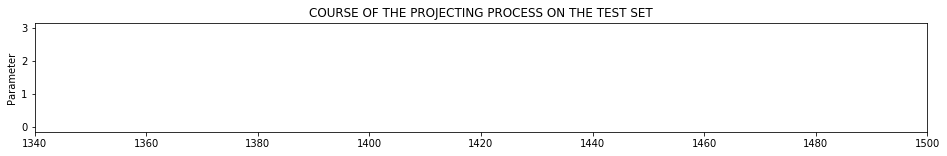

In [64]:
fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y', 'y_interp']:
    ax.plot(NOWA, label=ewa)
    
ax.set_xlim(1340, 1500)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

<Figure size 432x288 with 0 Axes>

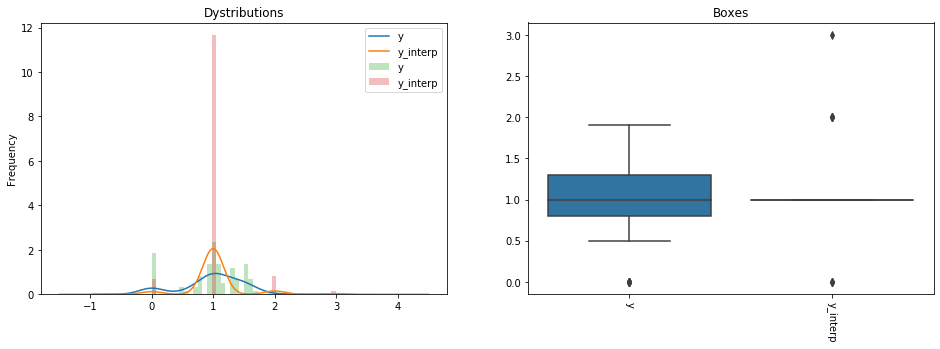

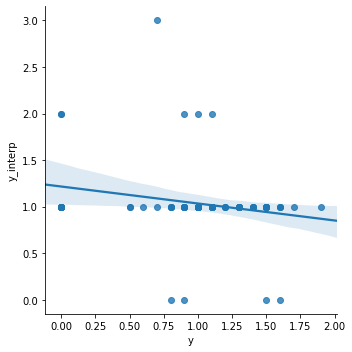

In [65]:
## marginesy
plt.subplots_adjust( left = None , bottom = None , right = None , top = None , wspace = None , hspace = None )
plt.figure(figsize=(16,5))
ax = plt.subplot(1, 2, 1)
NOWA.plot.kde(ax=ax, legend=True, title='Histogram: y vs. y_interp')
NOWA.plot.hist(density=True,bins=40, ax=ax, alpha=0.3)
ax.set_title("Dystributions")

ax = plt.subplot(1, 2, 2)
sns.boxplot(data = NOWA)
plt.xticks(rotation=-90)
ax.set_title("Boxes")


sns.lmplot(data=NOWA, x='y', y='y_interp')

# Regression_Assessment

In [66]:
## Robi ocenę tylko dla jednej zmiennej

def Regression_Assessment(y, y_pred):
    
    from sklearn.metrics import r2_score 
    import scipy.stats as stats
    from statsmodels.graphics.gofplots import qqplot
    from matplotlib import pyplot
       
    print('-----two methods--------------')
    SS_Residual = sum((y-y_pred)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('r2_score:           %0.3f' % r_squared)
    #print('adjusted_r_squared: %0.3f' % adjusted_r_squared)
    #print('----r2_score------secound-method--------')  
    print('r2_score:           %0.3f' % r2_score(y, y_pred))  
    print()
    print('-------------------------------')
    MAE = (abs(y-y_pred)).mean()
    print('Mean absolute error     MAE:  %0.2f ' %  MAE)
    RMSE = np.sqrt(((y-y_pred)**2).mean())
    print('Root mean squared error RMSE: %0.2f ' %  RMSE)
    pt = (100*(y-y_pred))/y
    MAPE = (abs(pt)).mean()
    print('Mean absolute error     MAPE: %0.2f ' %  MAPE)
    print('-------------------------------')
    
    stat,pvalue0 = stats.ttest_1samp(a=(y-y_pred),popmean=0.0)

    if pvalue0 > 0.01:
        print('t-test H0: the sum of the model residuals is zero')
        print('OKAY! Model remains do not differ from zero - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue0) 
    else:     
        print('Bad - Model remains DIFFERENT FROM ZERO - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue0)  
    print('--------------------------------------------------------------------------------------------') 
  
       
    stat,pvalue2_1 = stats.shapiro(y)
    stat,pvalue2_2 = stats.shapiro(y_pred)

    if pvalue2_1 > 0.01:
        #print('Shapiro-Wilk H0: y have normal distribution?--------------------------------')
        print('OK Shapiro-Wolf! y have normal distribution - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue2_1) 
    else:     
        print('Bad Shapiro-Wilk - y NO NORMAL DISTRIBUTION - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue2_1)  
        print('--------------------------------------------------------------------------------------------')
    if pvalue2_2 > 0.01:
        #print('Shapiro-Wilk: y_pred have a normal distribution?--')
        print('OK Shapiro-Wolf! y_pred has a normal distribution - pvalue:% 0.4f> 0.01 (we do NOT reject h0)'% pvalue2_2) 
    else:     
        print('Bad Shapiro-Wilk y_pred NO NORMAL DISTRIBUTION - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue2_2)  
    
    qqplot(y, line='s')
    pyplot.show()

    qqplot(y_pred, line='s')
    pyplot.show()
       
    print('--------------------------------------------------------------------------------------------')
        
    stat,pvalue3 = stats.kruskal(y_pred,y)
    stat,pvalue4 = stats.f_oneway(y_pred,y)

    if pvalue2_1 < 0.01 or pvalue2_2 < 0.01:
        print('Шапиро-Вилк: Переменные не имеют нормального распределения! Не могу сделать анализ ANOV')
     
        if pvalue3 > 0.01:
            print('Kruskal-Wallis NON-PARAMETRIC TEST: whether empirical forecast and observations. have equal means?')
            print('OKAY! Kruskal-Wallis H0: forecast and observations empir. have equal means - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue3) 
        else:     
            print('Bad - Kruskal-Wallis: forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue3)  
    
    else:

        if pvalue4 > 0.01:
            print('F-test (ANOVA): whether empirical forecast and observations. have equal means?--------------------------------')
            print('OKAY! forecast and observations empir. have equal means - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue4) 
        else:     
            print('Bad - forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue4)  
    print('--------------------------------------------------------------------------------------------')

-----two methods--------------
r2_score:           -1.084
r2_score:           -1.084

-------------------------------
Mean absolute error     MAE:  0.48 
Root mean squared error RMSE: 0.69 
Mean absolute error     MAPE: inf 
-------------------------------
t-test H0: the sum of the model residuals is zero
OKAY! Model remains do not differ from zero - pvalue: 0.4501> 0.01 (we do NOT reject H0)
--------------------------------------------------------------------------------------------
Bad Shapiro-Wilk - y NO NORMAL DISTRIBUTION - pvalue: 0.0000 <0.01 (We reject H0)
--------------------------------------------------------------------------------------------
Bad Shapiro-Wilk y_pred NO NORMAL DISTRIBUTION - pvalue: 0.0000 <0.01 (We reject H0)


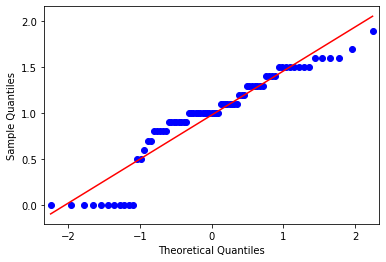

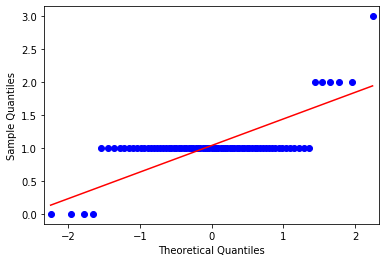

--------------------------------------------------------------------------------------------
Шапиро-Вилк: Переменные не имеют нормального распределения! Не могу сделать анализ ANOV
Kruskal-Wallis NON-PARAMETRIC TEST: whether empirical forecast and observations. have equal means?
OKAY! Kruskal-Wallis H0: forecast and observations empir. have equal means - pvalue: 0.5969> 0.01 (we do NOT reject H0)
--------------------------------------------------------------------------------------------


In [67]:
y = NOWA['y']
y_interp = NOWA['y_interp']

Regression_Assessment(y, y_interp)

# Sprawdzenie na odłożonym miesiącu 12 miesiąc


In [68]:
gf = df[df['mnth']==12]
print(gf.shape)
gf.head(4)

KeyError: 'mnth'

In [ ]:
X12 = gf.drop(['cnt','registered','casual'],1)
y12 = gf['cnt']

Normalizacja 12- tego miesiąca

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X12 = sc.fit_transform(X12)

print(np.round(X12.std(), decimals=2), np.round(X12.mean(), decimals=2))

In [ ]:
X12 = torch.tensor(X12)
X12 = X12.type(torch.FloatTensor)
print(X12[:3])

In [ ]:
y12 = (y12/ 100)  # max test score is 100
print(y.head(3))
print('---------------------')
print(np.round(y12.std(), decimals=2), np.round(y12.mean(), decimals=2))

In [ ]:
y12.shape

In [ ]:
y12 = y12.values

In [ ]:
y12 = torch.tensor(y12)
print(y12[:3])

In [ ]:
y12 = y12.type(torch.FloatTensor)

In [ ]:
print('X12:',X12.shape)
print('y12:',y12.shape)

bez sensu

In [ ]:
with torch.no_grad():
    y_model = KOT(X12)  
    loss = (y_model - y12).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

In [ ]:
y_model = y_model*100
foka = y_model.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_model']
df11=np.round(df11.y_model)
df11.head(3)

In [ ]:
df11 = pd.DataFrame(df11)
df11.head(5)

In [ ]:
y12 = y12*100
y12 = np.round(y12)
foka = y12.cpu().detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y12']
df_t.head(5)

In [ ]:
Super_NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
Super_NOWA.head(3)

In [ ]:
fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y12', 'y_model']:
    ax.plot(Super_NOWA, label=ewa)
    
ax.set_xlim(1000, 1300)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

In [ ]:
## marginesy
plt.subplots_adjust( left = None , bottom = None , right = None , top = None , wspace = None , hspace = None )
plt.figure(figsize=(16,5))
ax = plt.subplot(1, 2, 1)
Super_NOWA.plot.kde(ax=ax, legend=True, title='Histogram: y12 vs. y_model')
Super_NOWA.plot.hist(density=True,bins=40, ax=ax, alpha=0.3)
ax.set_title("Dystributions")

ax = plt.subplot(1, 2, 2)
sns.boxplot(data = Super_NOWA)
plt.xticks(rotation=-90)
ax.set_title("Boxes")


sns.lmplot(data=Super_NOWA, x='y12', y='y_model')

In [ ]:
y = Super_NOWA['y12']
y_pred = Super_NOWA['y_model']

Regression_Assessment(y, y_pred)

# Вышло плохо - методы устранения явления перенапряжения должны быть реализованы!

## Mean absolute error MAE i RMSE
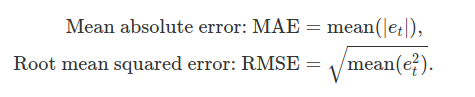

## Percentage errors MAPE



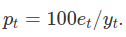